# Churn in Telecom's Dataset

The dataset is the "Churn in Telecom's Dataset" found at https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. 
The churn is commonly known as the discontinuing of the telecom service subscriptions. For a telecommunication service provider, being able to realize the factors behind churn is very important in order not lose more subscribers. In this project, we will try to find which features most affect churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('churndata.csv')

** Overview of the Data **  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.nunique() #number of distinct values
# --> seems phone number is redundant and needs to be dropped

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [6]:
df.isnull().sum(axis = 0) 
#--> there are no NULL values in the dataset

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

** Visual Analysis by Various Factors **

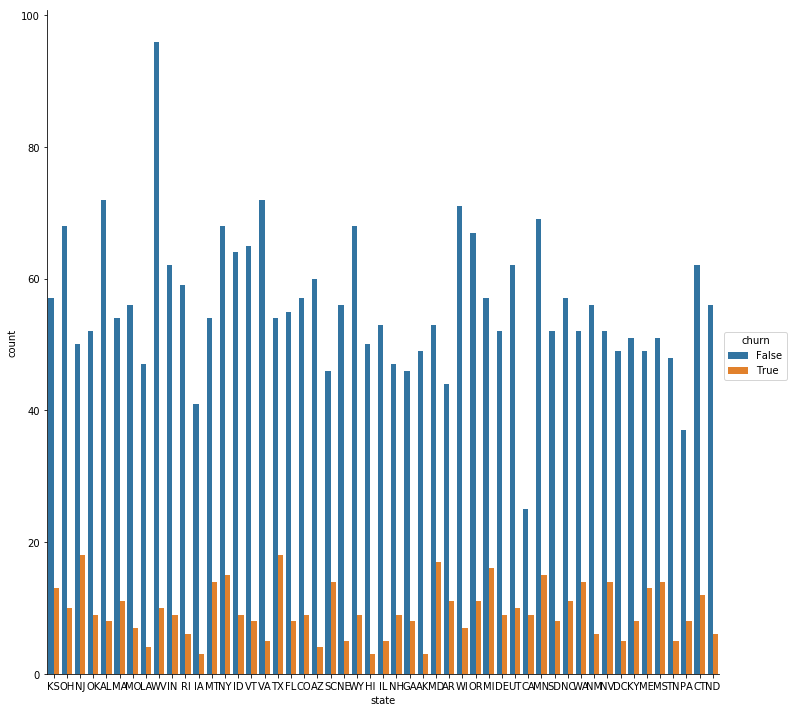

In [8]:
sns.factorplot(x='state', hue='churn', data= df, kind='count',size= 10)

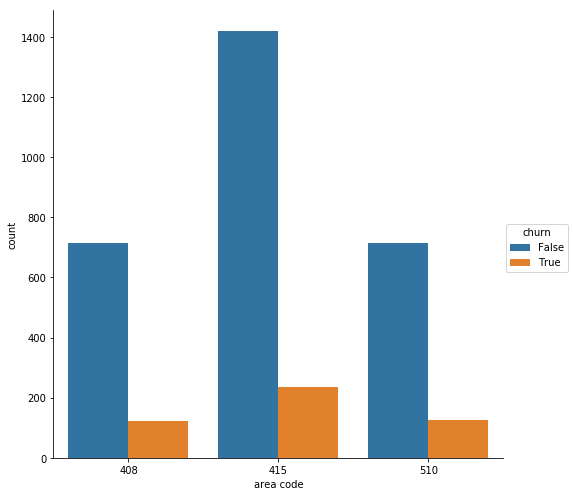

In [9]:
sns.factorplot(x='area code', hue='churn', data= df, kind='count',size= 7)

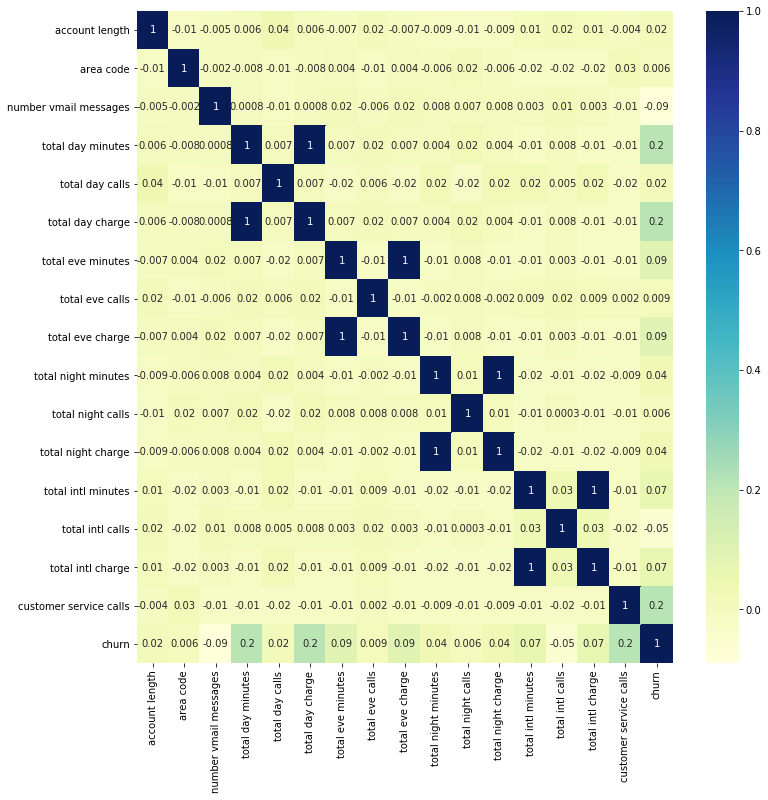

In [10]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot= True,fmt='.1g', cmap="YlGnBu", ax=ax)
#--> total charges are proportional to total minutes for day, evening and night minutes, respectively --> Meaningful
#    churn rate seems to be correlated with customer service calls, total day charge and total day minutes at first look

**Preprocessing the Data**

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()

df['state'] = le.fit_transform(df['state'])
df['international plan'] = lb.fit_transform(df['international plan'])
df['voice mail plan'] = lb.fit_transform(df['voice mail plan'])
df['area code'] = le.fit_transform(df['area code'])

y= lb.fit_transform(df['churn'])

In [12]:
# Drop unnecessary columns
df.drop(['phone number', 'churn'], inplace= True, axis=1)


In [13]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


** Scale the training matrix **

In [14]:
# Building and Scaling
X= df
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis=0), X_scaled.std(axis=0) ## Zero mean and Unit variance

(array([ 1.10855752e-16,  1.47097056e-16,  1.01262466e-16, -4.79664313e-17,
        -6.60870831e-17,  7.03507659e-17,  7.31221597e-16, -1.93464606e-16,
        -2.83534905e-16, -6.82189245e-17,  3.28836535e-16,  1.38569690e-16,
         7.88781315e-17, -4.90323520e-17, -4.37027485e-17, -3.33633178e-16,
        -8.52736557e-18,  2.72875698e-16,  8.52736557e-18]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

**Training **

We will evaluate the performance of 7 classifiers.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

cls1= LogisticRegression(penalty='l2', C=0.5, random_state=8, solver='sag')
cls2= SVC(C=0.5, kernel='sigmoid')
cls3= KNeighborsRegressor(n_neighbors= 6, weights='distance', p=2) # Euclidean distance
cls4= DecisionTreeClassifier(min_samples_leaf=10)
cls5= RandomForestRegressor(n_estimators=50, max_features=5, criterion='mse', max_leaf_nodes=20, min_samples_split=4)
cls6= AdaBoostRegressor(n_estimators=200, learning_rate=0.5, random_state=8)
cls7= GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, criterion='mse', max_features='auto', min_samples_split=5, random_state=8)

cls= [cls1, cls2, cls3, cls4, cls5, cls6, cls7]
classifiers= ['Logistic Regression','SVC','K Neigh. Reg.','Dec. Tree Classifier',
              'Random Forest','Ada Boost','Gradient Boosting']

In [119]:
# Evaluating Performance of Models
# Our evaluation depends on accuracy score.

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

result = []
y_scaled= y.ravel() # turn y into 1d format
y_pred= y_scaled.copy()

for i,clff in enumerate(cls):
    #print(clff)
    clf= make_pipeline(clff)
    kfold = KFold(n_splits= 8, random_state= 42, shuffle= True)
    cv_score= cross_val_score(clf, X_scaled, y_scaled, cv=kfold, scoring='r2')    
    
    for train_index, test_index in kfold.split(X_scaled):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_scaled[train_index], y_scaled[test_index]
        clff.fit(X_train,y_train)
        y_pred[test_index]= clff.predict(X_test)
           
    clf_acc= metrics.accuracy_score(y_scaled, y_pred)
    print("%s: Mean: %.4f STD: %.4f Accuracy: %.4f" %(classifiers[i], cv_score.mean(), cv_score.std(), clf_acc))

    target_names = ['False', 'True']
    print(classifiers[i], ':\n', classification_report(y_scaled, y_pred, target_names=target_names))
    
    result.append(cv_score)
    

Logistic Regression: Mean: -0.1236 STD: 0.0798 Accuracy: 0.8611
Logistic Regression :
              precision    recall  f1-score   support

      False       0.88      0.97      0.92      2850
       True       0.56      0.21      0.30       483

avg / total       0.83      0.86      0.83      3333

SVC: Mean: -0.3804 STD: 0.1055 Accuracy: 0.8296
SVC :
              precision    recall  f1-score   support

      False       0.86      0.96      0.91      2850
       True       0.23      0.07      0.11       483

avg / total       0.77      0.83      0.79      3333

K Neigh. Reg.: Mean: 0.3239 STD: 0.0282 Accuracy: 0.8578
K Neigh. Reg. :
              precision    recall  f1-score   support

      False       0.86      1.00      0.92      2850
       True       1.00      0.02      0.04       483

avg / total       0.88      0.86      0.79      3333

Dec. Tree Classifier: Mean: 0.5470 STD: 0.0905 Accuracy: 0.9445
Dec. Tree Classifier :
              precision    recall  f1-score   suppor

C:\Users\y\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ada Boost: Mean: 0.3955 STD: 0.0543 Accuracy: 0.8554
Ada Boost :
              precision    recall  f1-score   support

      False       0.86      1.00      0.92      2850
       True       1.00      0.00      0.00       483

avg / total       0.88      0.86      0.79      3333

Gradient Boosting: Mean: 0.6089 STD: 0.0406 Accuracy: 0.8653
Gradient Boosting :
              precision    recall  f1-score   support

      False       0.86      1.00      0.93      2850
       True       1.00      0.07      0.13       483

avg / total       0.88      0.87      0.81      3333



<Figure size 432x288 with 0 Axes>

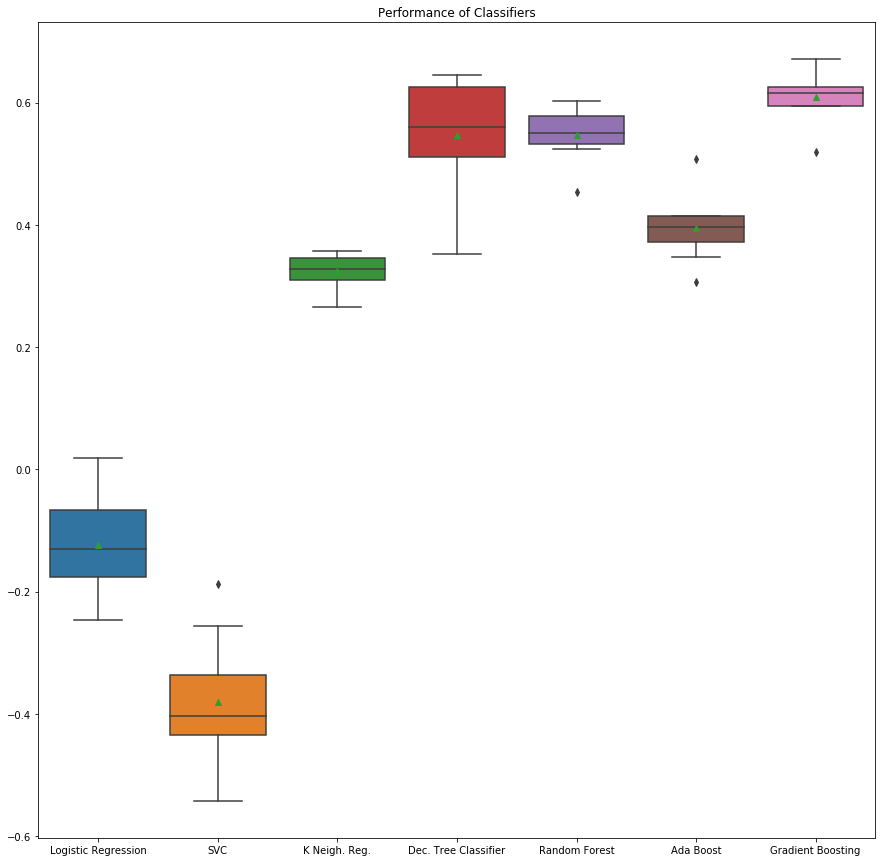

In [120]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Performance of Classifiers')
sns.boxplot(data=result, showmeans=True)
ax.set_xticklabels(classifiers, fontsize=10)
plt.show()

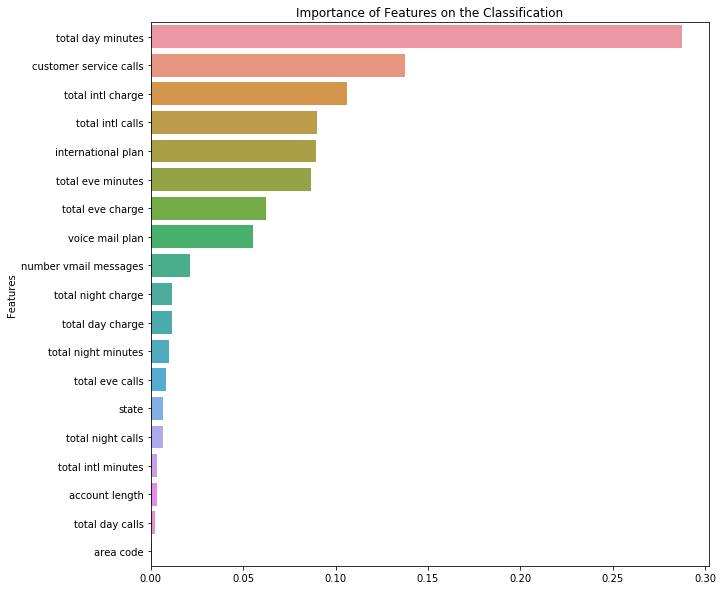

In [118]:
clffinal = DecisionTreeClassifier(min_samples_leaf=10)
clffinal.fit(X_scaled, y_scaled)
# plot the important features #
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Importance of Features on the Classification')
ax.set_ylabel('Features')

aaa= pd.Series(clffinal.feature_importances_, index= df.columns)
bbb= aaa.sort_values(ascending= False)
sns.barplot(y=bbb.index, x=bbb)


**Result**

Decision Tree Classifier performs better than other classifiers. K Neighbor classifier provides the smallest standard deviation. We see that total day minutes, customer service calls, total intl charge have more importance on the churn than the other features.